In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyvi import ViTokenizer
from nltk.tokenize import word_tokenize

In [2]:
ALL_DATASET = '/home/ductri/code/all_dataset/'
ENTROPY_DATASET = ALL_DATASET + 'entropy_2018/'
df = pd.read_csv(ENTROPY_DATASET + 'all_data.csv')

Total training data: 102598


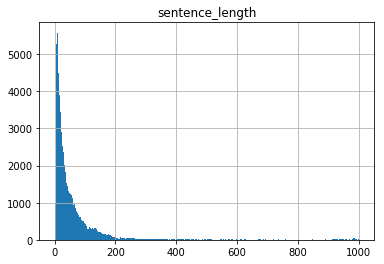

In [3]:
df['sentence_length'] = df['sentence'].map(lambda x: len(word_tokenize(x)))

print('Total training data: {}'.format(df.shape[0]))
df.hist('sentence_length', bins=500, range=(0, 1000))
plt.show()

In [4]:
df.groupby('sentiment').describe()

sentence_length                                                  \
                    count        mean         std  min   25%   50%    75%   
sentiment                                                                   
negative          30764.0  141.102457  300.766083  1.0  15.0  33.0  100.0   
neutral           39314.0   38.308135   33.904535  3.0  13.0  28.0   52.0   
positive          32520.0   70.513745  121.836011  1.0  14.0  38.0   89.0   

                   
              max  
sentiment          
negative   7801.0  
neutral     283.0  
positive   3954.0

In [7]:
df.describe()

,sentence_length
count,102598.000000
mean,79.339061
std,184.615647
min,1.000000
25%,14.000000
50%,31.000000
75%,71.000000
max,7801.000000


In [5]:
shuffled_index = list(range(df.shape[0]))
np.random.shuffle(shuffled_index)

In [6]:
df_shuffled = df.iloc[shuffled_index, :]

In [7]:
df.head()

,sentence,sentiment,sentence_length
0,Tên sản phẩm: Dầ...,negative,580
1,TV led sony! mới mở thì màu BT. Một lúc ...,negative,201
2,"Sữa vn chị thấy ngọt lắm , với mùi vani nên ch...",negative,122
3,Tpb dạo này pr vs làm thương hiệu ghê:)))) so ...,negative,80
4,7+ chán bán đổi qua S8+,negative,23


In [8]:
df_shuffled.head()

,sentence,sentiment,sentence_length
42761,Anh Phi nhìn chảy nc miếng,neutral,26
9917,Má ơi iu quái biến dạng 🤣🙏🏻 #รีวิวหน้าใหม่ค่...,negative,81
32704,NguyenPhong di hok? Voucher co HSD den bao gio...,neutral,54
42620,"Chào bạn, màn hình IPS có giá tham khảo từ 2 t...",neutral,196
43094,Xin chân thành cảm ơn nhà mạng MobiFone July ...,neutral,130


In [9]:
del df_shuffled['sentence_length']

In [11]:
train_ratio = 0.9
split_index = int(train_ratio*df_shuffled.shape[0])
df_shuffled.iloc[:split_index, :].to_csv(ENTROPY_DATASET + 'training_set.csv', index=False)
df_shuffled.iloc[split_index:, :].to_csv(ENTROPY_DATASET + 'test_set.csv', index=False)

In [12]:
df_train = pd.read_csv(ENTROPY_DATASET + 'training_set.csv')
df_test = pd.read_csv(ENTROPY_DATASET + 'test_set.csv')

In [14]:
df_test.shape

(10260, 2)

In [6]:
df_train['length'] = df_train['sentence'].map(len)
df_test['length'] = df_test['sentence'].map(len)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f330df6b828>]],
      dtype=object)

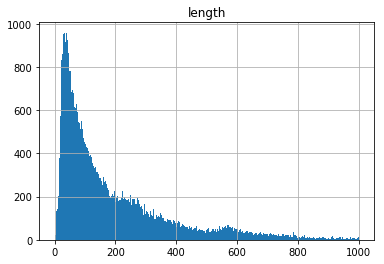

In [7]:
df_train.hist('length', bins=500, range=(0, 1000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33109b4b00>]],
      dtype=object)

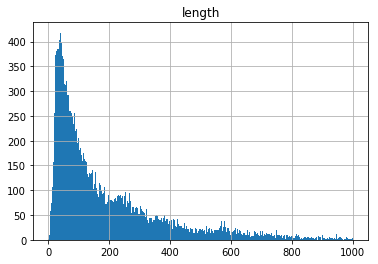

In [8]:
df_test.hist('length', bins=500, range=(0, 1000))

In [46]:
text=df_test.iloc[14638]['sentence']

In [48]:
text="""******************************************************************** vinaphone plus - chương trình ưu đãi đích thực ******************************************************************** áp đụng cho tất cả các thuê bao di động vinaphone trả trước/trả sau đang hoạt động. khi là hội viên, quý khách hàng được hưởng các chương trình miễn phí/giảm giá từ vinaphone và các đối tác liên kết dựa theo mức điểm tích lũy của từng hội viên.  > quý khách có thể đăng ký qua  hình thức như sau: , soạn tin dk gửi  và làm theo hướng dẫn; , truy cập  urlpatt  , tải ứng dụng vinaphone plus về máy di động và đăng ký; , đăng ký trực tiếp tại các điểm giao dịch của vinaphone. >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ứng dụng trao tay - nhận ngay ưu đãi ----------------------------------------------------------------------------------------- hãy đăng ký thành viên vinaphone plus ngay hôm nay vnpt - vinaphone điện biên added  new photos — feeling excited. photos from vnpt - vinaphone điện biên's post"""

In [ ]:

ViTokenizer.tokenize(text).split(' ')

In [ ]:
texts.iloc[-5]

In [28]:
len(text)

3974